<h1>Sentimental Analysis Of NLP</h1>

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("IMDB Dataset.csv")
df.head(4)



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative


In [2]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<h1> 2 - Date Cleaning </h1>

In [3]:

df["review"][0]


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [4]:

df=df.iloc[:10000]

df.drop_duplicates()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [5]:

df["review"] = df["review"].str.lower()
df["review"] = df["review"].str.strip()


In [6]:
# remove html tags

# learn from w3 schools

import re
def remove_html(data):
    data=re.sub(r'<.*?>','',data)
    return data

df["review"] = df["review"].apply(remove_html)



In [7]:

# remove_html(df["review"])

df["review"] = df["review"].str.replace(r'<.*?>',"")



In [8]:
# Removing URLS

def remove_url(data):
    data=re.sub(r"https?://\S+|www\.\S+",'',data)
    return data



In [9]:

# To check url present or not

df[df["review"].str.contains(r"https?://\S+|www\.\S+",'')].iloc[0].values



array(['mario lewis of the competitive enterprise institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled a convenient lie. the website address where his debunking report, which is titled "a skeptic\'s guide to an inconvenient truth" can be found at is :www.cei.org. a shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the y2k scare of 1999, which gore also endorsed, as he did the pseudo-scientific film the day after tomorrow, which was based on a book written by alleged ufo abductee whitley strieber. as james "the amazing" randi does to psychics, and philip klass does to ufos, and gerald posner does to jfk conspir-idiocy theories, so does mario lewis does to al gore\'s movie and the whole "global warming" scam.',
       'negative'], dtype=object)

In [10]:

df["review"] = df["review"].str.replace(r"https?://\S+|www\.\S+",'')


In [11]:
# Expanding Abbrebations

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data




In [12]:
df["review"] = df["review"].apply(remove_abb)

In [13]:
pip install textblob

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob

In [15]:

text = "hi i cam wri nigt"
TextBlob(text).correct().string


'hi i can writ night'

In [16]:

# def Correct_Spelling(text):
#     return TextBlob(text).correct().string

# df["review"].apply(Correct_Spelling)


In [17]:

# Puncutation

import string


In [18]:

string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:

def Remove_Puncutation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i , "")
    return text


Remove_Puncutation("Hi!! How Are U?")


'Hi How Are U'

In [20]:
df["review"] = df["review"].apply(Remove_Puncutation)

In [21]:
# df["review"] = df["review"].str.replce('[^\w\s]','')

<h1>3 - Data Preprocessing</h1>

<h1>Tokenizations</h1>

In [23]:

from nltk.tokenize import word_tokenize
import nltk


In [38]:
pip install wordcloud matplotlib

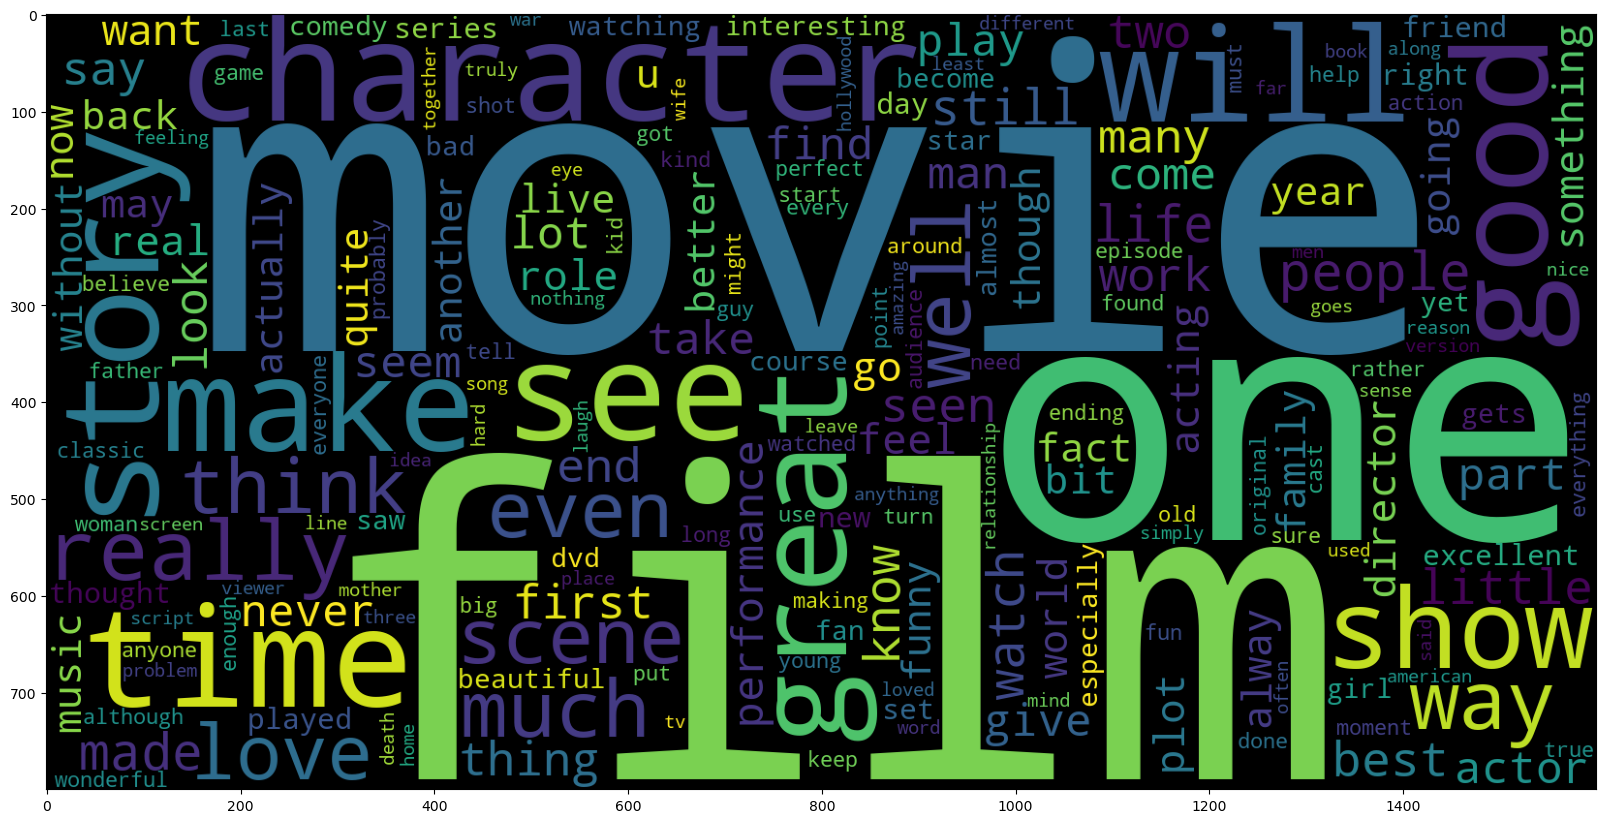

In [39]:
# wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Positive Review Text
wc = WordCloud(width=1600, height=800).generate(" ".join(df[df['sentiment'] == "positive"]["review"]))
plt.imshow(wc)


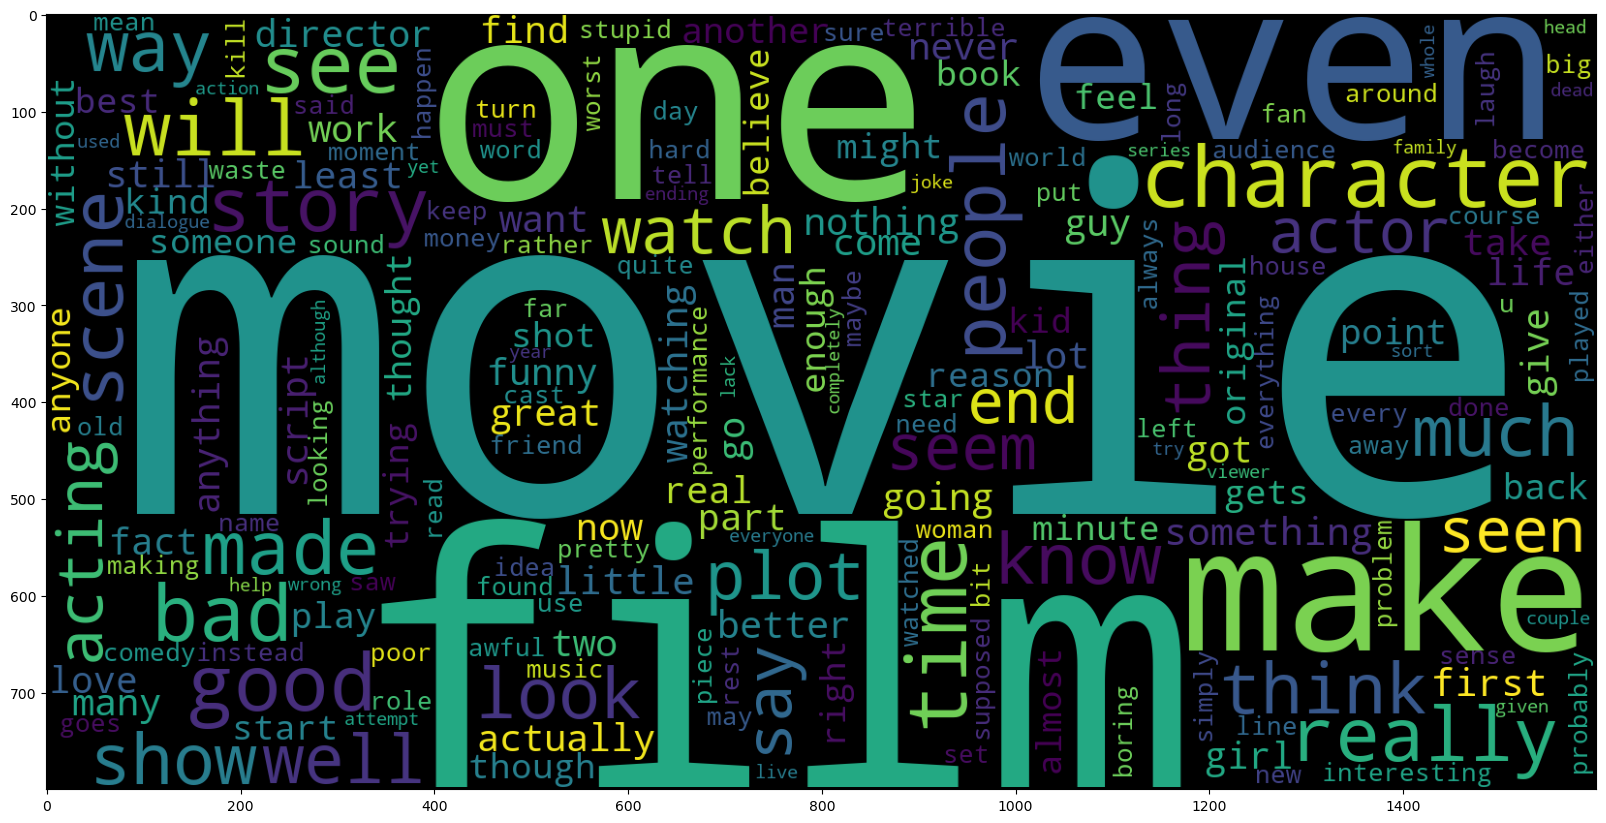

In [40]:
# wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Positive Review Text
wc = WordCloud(width=1600, height=800).generate(" ".join(df[df['sentiment'] == "negative"]["review"]))
plt.imshow(wc)
